In [42]:
import pandas as pd

In [43]:
test = pd.read_csv('test.csv')

In [44]:
sample = pd.read_csv('sample.csv')

In [45]:
train = pd.read_csv('train.csv')

In [46]:
print("전체 행 개수 :", len(train))
print(train.isna().sum())     

전체 행 개수 : 1200000
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


## 데이터 전처리(나머지 변수, 공통)

In [62]:
# Number of Dependents: 구간화(Binning) & 결측 플래그 추가
import numpy as np

# 결측 플래그 생성
train['Number_of_Dependents_missing'] = train['Number of Dependents'].isnull().astype(int)

# 구간화 예시 (0명, 1~2명, 3명 이상)
bins = [-np.inf, 0, 2, np.inf]
labels = ['0', '1-2', '3+']
train['Number_of_Dependents_bin'] = pd.cut(train['Number of Dependents'], bins=bins, labels=labels)

In [63]:
# 나이에 대한 결측 플래그 및 중앙값 대체 예시
train['Age_missing'] = train['Age'].isnull().astype(int)
train['Age'] = train['Age'].fillna(train['Age'].median())

# Annual Income
train['Annual_Income_missing'] = train['Annual Income'].isnull().astype(int)
train['Annual Income'] = train['Annual Income'].fillna(train['Annual Income'].median())

# Health Score
train['Health_Score_missing'] = train['Health Score'].isnull().astype(int)
train['Health Score'] = train['Health Score'].fillna(train['Health Score'].median())

# Credit Score
train['Credit_Score_missing'] = train['Credit Score'].isnull().astype(int)
train['Credit Score'] = train['Credit Score'].fillna('Missing')

# Customer Feedback
train['Customer_Feedback_missing'] = train['Customer Feedback'].isnull().astype(int)
train['Customer Feedback'] = train['Customer Feedback'].fillna('No Feedback')

In [64]:
# Vehicle Age 결측 행 삭제
train = train[train['Vehicle Age'].notnull()]

In [65]:
# Insurance Duration 결측 행 삭제
train = train[train['Insurance Duration'].notnull()]

In [66]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Exercise Frequency,Property Type,Premium Amount,Number_of_Dependents_missing,Number_of_Dependents_bin,Age_missing,Annual_Income_missing,Health_Score_missing,Credit_Score_missing,Customer_Feedback_missing
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,Weekly,House,2869.0,0,1-2,0,0,0,0,0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,Monthly,House,1483.0,0,3+,0,0,0,0,0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,Weekly,House,567.0,0,3+,0,0,0,0,0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,Daily,Apartment,765.0,0,1-2,0,0,0,0,0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,Weekly,House,2022.0,0,1-2,0,0,0,0,0


### 상관계수

In [59]:
pip install pandas numpy seaborn matplotlib scipy scikit-learn


     |████████████████████████████████| 22.4 MB 10.0 MB/s eta 0:00:010:00:02
     |████████████████████████████████| 8.7 MB 55.6 MB/s eta 0:00:01
     |████████████████████████████████| 307 kB 46.2 MB/s eta 0:00:01
You should consider upgrading via the '/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [71]:
train['Premium Amount'].isna().sum()

np.int64(0)

/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


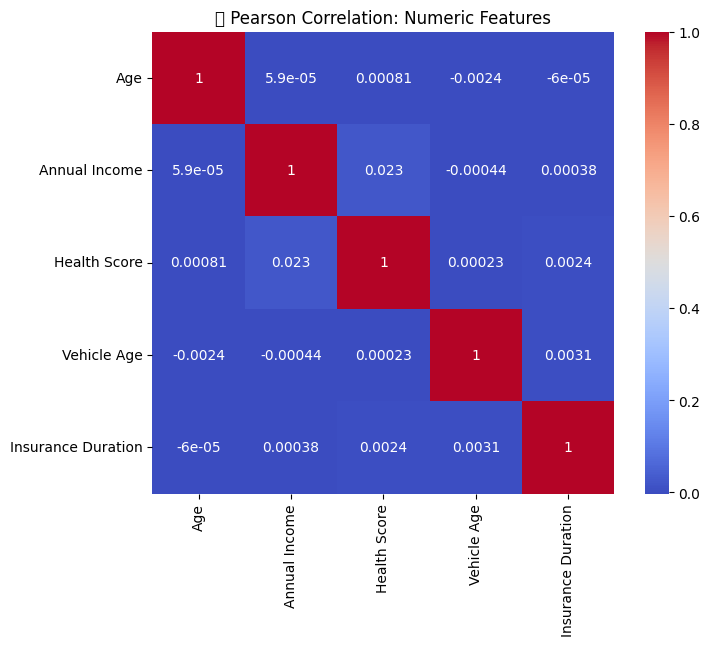

/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


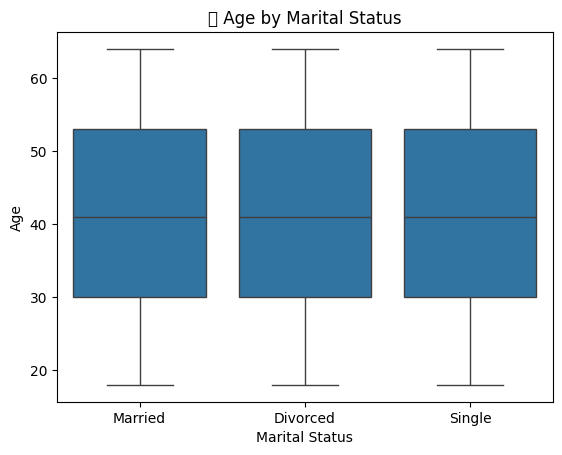

/var/folders/b9/dfc3sg191zvbsylvkl6d4ty40000gn/T/ipykernel_1578/2637454155.py:38: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_result = stats.f_oneway(*grouped)


ANOVA p-value: nan
Chi2-test p-value: 0.8108995189145403
Cramér’s V: 0.000819853758634712


/var/folders/b9/dfc3sg191zvbsylvkl6d4ty40000gn/T/ipykernel_1578/2637454155.py:61: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/t2023-m0149/Documents/GitHub/4gun4_new_project/alex/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


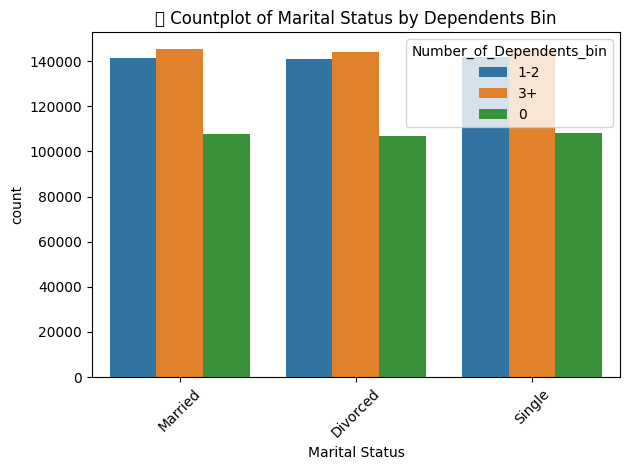

ValueError: Input X contains NaN.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder


# 전처리: Number_of_Dependents_bin 생성
train['Number of Dependents'] = train['Number of Dependents'].fillna(0)
def bin_dependents(x):
   if x == 0:
       return '0'
   elif x <= 2:
       return '1-2'
   else:
       return '3+'
train['Number_of_Dependents_bin'] = train['Number of Dependents'].apply(bin_dependents)


# 1) 수치형 간 Pearson 상관분석
num_cols = ['Age', 'Annual Income', 'Health Score', 'Vehicle Age', 'Insurance Duration']
corr = train[num_cols].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('📊 Pearson Correlation: Numeric Features')
plt.show()


# 2) 범주형-수치형 분석: Boxplot + ANOVA
sns.boxplot(x='Marital Status', y='Age', data=train)
plt.title('🎯 Age by Marital Status')
plt.show()


grouped = [train.loc[train['Marital Status'] == g, 'Age'].dropna() for g in train['Marital Status'].unique()]
anova_result = stats.f_oneway(*grouped)
print('ANOVA p-value:', anova_result.pvalue)


# 3) 범주형-범주형 분석: 카이제곱 + Cramér’s V + Countplot
contingency = pd.crosstab(train['Marital Status'], train['Number_of_Dependents_bin'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('Chi2-test p-value:', p)


def cramers_v(conf_matrix):
   chi2 = stats.chi2_contingency(conf_matrix)[0]
   n = conf_matrix.sum().sum()
   r, k = conf_matrix.shape
   return np.sqrt(chi2 / (n * (min(r, k)-1)))


print("Cramér’s V:", cramers_v(contingency))


sns.countplot(data=train, x='Marital Status', hue='Number_of_Dependents_bin')
plt.title('📦 Countplot of Marital Status by Dependents Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4) Mutual Information 분석 (혼합형)
df_enc = train.copy()


# 범주형 변수 인코딩
for col in df_enc.select_dtypes(include=['object', 'category']).columns:
   df_enc[col] = LabelEncoder().fit_transform(df_enc[col].astype(str))


# Y값 (target 변수) 설정
y = df_enc['Premium Amount']  # ← target 변수명 필요 시 수정
X = df_enc.drop(columns=['Premium Amount'])


# Mutual Information 계산
mi = mutual_info_regression(X, y, discrete_features='auto')
mi_df = pd.DataFrame({'feature': X.columns, 'mutual_info': mi})
mi_df = mi_df.sort_values(by='mutual_info', ascending=False)


# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='mutual_info', data=mi_df)
plt.title('🧠 Mutual Information with Target')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 실험1

1. Occupation
- 1-1. 'unknown'으로 대체
- 1-2. 범주별 annual income값 비교해서 대체

2. Previous Claims
- 2-1. 0값으로 처리
- 2-2. 0~9 범주화, null로 대체

### 실험1 > 1-1 & 2-1

In [ ]:
train1 = train.copy()
train1['Occupation'] = train1['Occupation'].fillna('Unknown')
train1['Previous Claims'] = train1['Previous Claims'].fillna(0)